In [2]:
import meep as mp

In [3]:
# Create the cell
cell = mp.Vector3(16,16)

# Create geometry
geometry = [
    mp.Block(mp.Vector3(12,1,mp.inf),
             center = mp.Vector3(-2,3.5),
             material = mp.Medium(epsilon=12)),
    mp.Block(mp.Vector3(1,12,mp.inf),
             center = mp.Vector3(3.5,-2),
             material = mp.Medium(epsilon=12))
]

# Create boundaries
pml_layers = [mp.PML(1.0)]

# Resolution setting
resolution = 10

In [4]:
# Define source
sources = [mp.Source(mp.ContinuousSource(wavelength=2*(12**0.5), width =20),
                     component=mp.Ez,
                     center = mp.Vector3(-7,3.5),
                     size = mp.Vector3(0,1))]

In [5]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    sources=sources,
                    geometry=geometry,
                    resolution=resolution)

In [6]:
# Setup directory
sim.use_output_directory("bent")

'bent'

In [7]:
sim.run(mp.at_beginning(mp.output_epsilon), mp.at_every(0.6, mp.output_png(mp.Ez, "-Zc dkbluered")), until = 200)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000967979 s
Working in 2D dimensions.
Computational cell is 16 x 16 x 0 with resolution 10
     block, center = (-2,3.5,0)
          size (12,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (3.5,-2,0)
          size (1,12,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.0487821 s
-----------
Meep: using output directory 'bent'


FloatProgress(value=0.0, description='0% done ', max=200.0)

creating output file "bent/eps-000000.00.h5"...
creating output file "bent/ez-000000.60.h5"...
creating output file "bent/ez-000001.20.h5"...
creating output file "bent/ez-000001.80.h5"...
creating output file "bent/ez-000002.40.h5"...
creating output file "bent/ez-000003.00.h5"...
creating output file "bent/ez-000003.60.h5"...
creating output file "bent/ez-000004.20.h5"...
creating output file "bent/ez-000004.80.h5"...
creating output file "bent/ez-000005.40.h5"...
creating output file "bent/ez-000006.00.h5"...
creating output file "bent/ez-000006.60.h5"...
creating output file "bent/ez-000007.20.h5"...
creating output file "bent/ez-000007.80.h5"...
creating output file "bent/ez-000008.40.h5"...
creating output file "bent/ez-000009.00.h5"...
creating output file "bent/ez-000009.60.h5"...
creating output file "bent/ez-000010.20.h5"...
creating output file "bent/ez-000010.80.h5"...
creating output file "bent/ez-000011.40.h5"...
creating output file "bent/ez-000012.00.h5"...
creating out

FloatProgress(value=0.0, description='0% done ', max=200.0)

creating output file "./eps-000000.00.h5"...
run 7 finished at t = 200.0 (4000 timesteps)


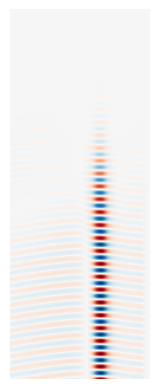

In [13]:
vals = []
def get_slice(sim):
    vals.append(sim.get_array(center = mp.Vector3(0,3.5),
                              size = mp.Vector3(0,16),
                              component = mp.Ez))
    
sim.restart_fields()
sim.run(mp.at_beginning(mp.output_epsilon),
        mp.at_every(0.6, get_slice),
        until=200)

import matplotlib.pyplot as plt

plt.figure()
plt.imshow(vals, interpolation = 'spline36', cmap = 'RdBu')
plt.axis('off')
plt.show()